# Concrete Strength Regression w/ KNN

In this notebook, we apply **K-Nearest Neighbors (KNN) regression** to the well-known concrete dataset, which contains measurements of concrete mixtures and their corresponding compressive strength. KNN regression is a non-parametric method that makes predictions by averaging the target values of the *k* closest training data points, where closeness is typically measured by a distance metric such as Euclidean distance. Unlike parametric methods, KNN does not assume a particular functional form for the relationship between features and target, making it especially useful for capturing complex, nonlinear patterns.

Beyond the standard introduction to KNN, this analysis specifically evaluates how the choice of the number of neighbors (**k**) affects predictive performance when estimating concrete compressive strength. We systematically run the regression for a range of *k* values and compute the **Mean Squared Error (MSE)** on validation/test data. By plotting MSE against different neighbor counts, we are able to identify the optimal value of *k* that yields the lowest prediction error. This approach highlights the importance of hyperparameter tuning in achieving accurate and reliable regression results.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Defaulting to user installation because normal site-packages is not writeable
    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


## Load Data

In [2]:
df = pd.read_csv("../../zData/Concrete/concrete.csv")

df.head()

X = df.drop("strength", axis=1)
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 824
Testing samples: 206


## Simple KNN n=5

In [3]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE with k=5:", mse)

MSE with k=5: 68.79345378640777


## Find Optimal Number of Neighbors

Best k: 3
Best MSE: 67.56350814455232


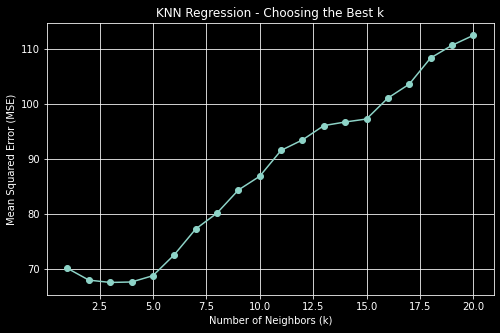

In [4]:
mse_list = []
k_values = range(1, 21)  # test k from 1 to 20

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

best_k = k_values[np.argmin(mse_list)]
best_mse = min(mse_list)

print("Best k:", best_k)
print("Best MSE:", best_mse)

plt.figure(figsize=(8,5))
plt.plot(k_values, mse_list, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression - Choosing the Best k")
plt.grid(True)
plt.show()

## Plot Actual vs Predicted

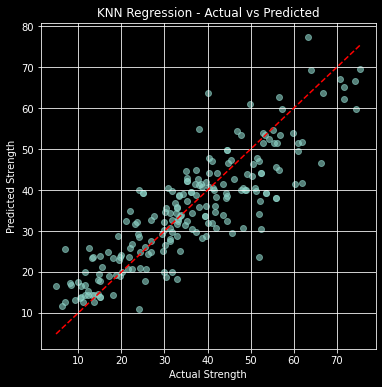

In [5]:
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_final_pred = final_knn.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_final_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("KNN Regression - Actual vs Predicted")
plt.grid(True)
plt.show()

## Error Analysis

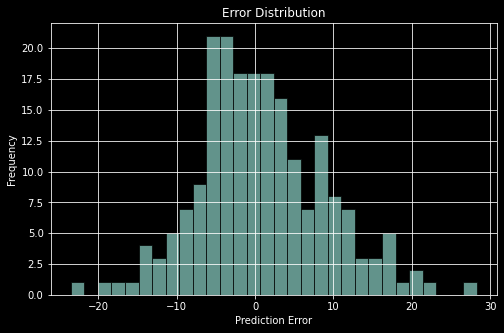

In [6]:
errors = y_test - y_final_pred

plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, edgecolor="k", alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.grid(True)
plt.show()